In [1]:
from google.colab import files

uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
def preprocess(df):
    df = df.copy()
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df["Sex"] = df["Sex"].map({"male":0, "female":1})
    df["Embarked"] = df["Embarked"].map({"S":0, "C":1, "Q":2})
    df = df.drop(["Name","Ticket","Cabin"], axis=1)
    return df


In [20]:
train_prep = preprocess(train)
test_prep = preprocess(test)

train_prep.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [21]:
from sklearn.model_selection import train_test_split

X = train_prep.drop("Survived", axis=1)
y = train_prep["Survived"]


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


val_preds = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, val_preds))


Validation Accuracy: 0.8324022346368715


In [26]:
test_preds = model.predict(test_prep)


submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_preds
})


submission.to_csv("my_submission.csv", index=False)


from google.colab import files
files.download("my_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

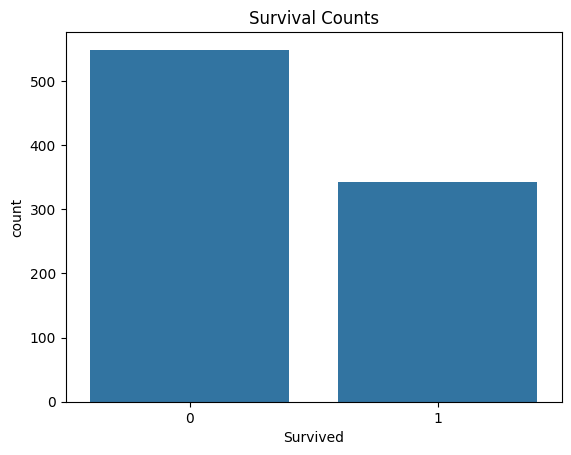

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Survived", data=train)
plt.title("Survival Counts")
plt.show()


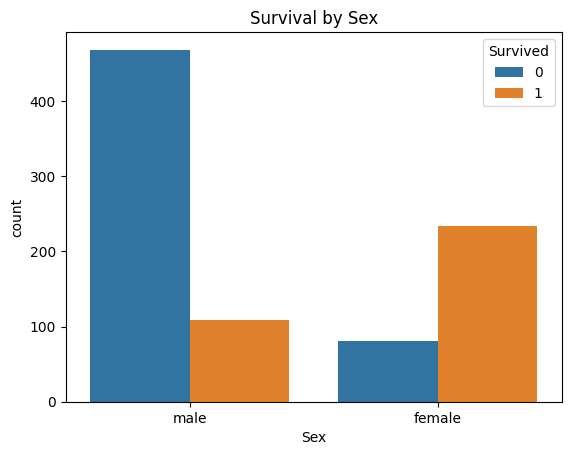

In [25]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by Sex")
plt.show()


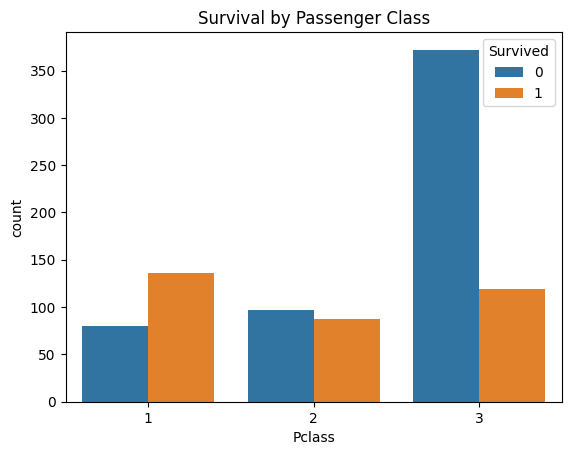

In [15]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()


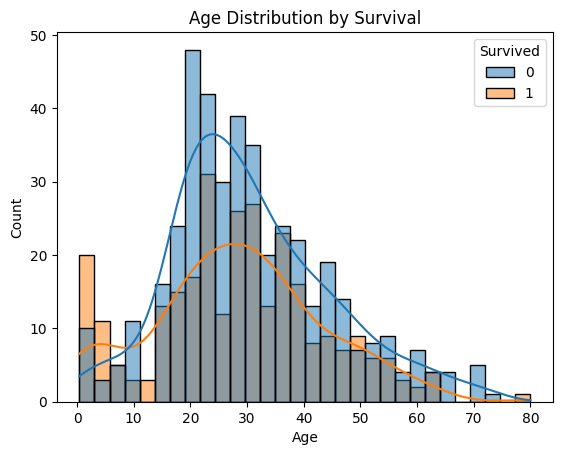

In [16]:
sns.histplot(data=train, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


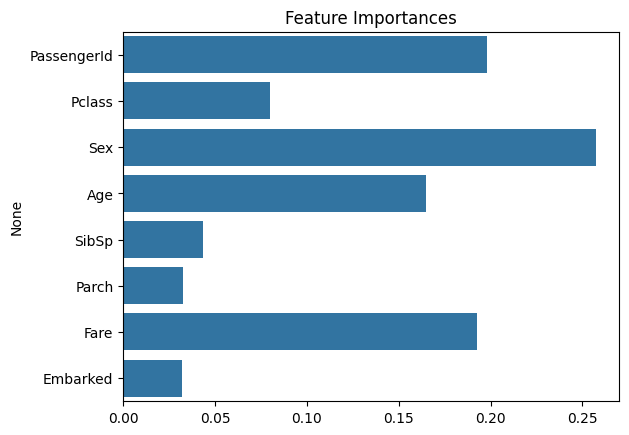

In [17]:
importances = model.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()
